# Trail Cam Animal Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import keras
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
deer_dir = "./deer"
nodeer_dir = "./nodeer"
target_size = 224
img_list = []
label = []

for img_name in os.listdir(deer_dir):
    img = load_img(deer_dir + "/" + img_name)
    img = img.resize((target_size,target_size))
    img_array = img_to_array(img)
    img_list.append(img_array)
    label.append(1)

for img_name in os.listdir(nodeer_dir):
    img = load_img(nodeer_dir + "/" + img_name)
    img = img.resize((target_size,target_size))
    img_array = img_to_array(img)
    img_list.append(img_array)
    label.append(0)

In [3]:
img_array, img_labels = shuffle(img_list,label)

In [4]:
img_array = np.array(img_array)
img_labels = np.array(img_labels)

In [10]:
def get_label(i):
    if i == 0:
        return "No Deer"
    else:
        return "Deer"

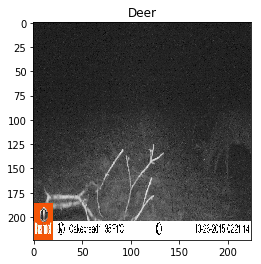

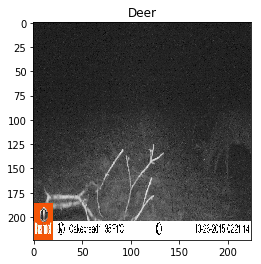

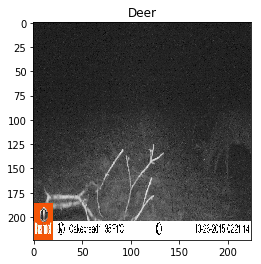

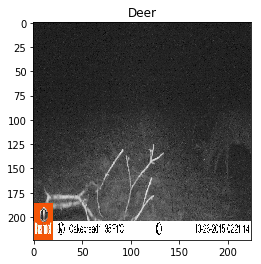

In [13]:
for i in range(0,4):
    plt.imshow(img_array[0]/255)
    plt.title(get_label(img_labels[0]))
    plt.show()

In [5]:
original_img_array = np.copy(img_array)

In [6]:
img_array[:][:][:][0] -= np.mean(img_array[:][:][:][0], axis = 0)
img_array[:][:][:][1] -= np.mean(img_array[:][:][:][1], axis = 0)
img_array[:][:][:][2] -= np.mean(img_array[:][:][:][2], axis = 0)

In [7]:
img_array[:][:][:][0] -= np.std(img_array[:][:][:][0], axis = 0)
img_array[:][:][:][1] -= np.std(img_array[:][:][:][1], axis = 0)
img_array[:][:][:][2] -= np.std(img_array[:][:][:][2], axis = 0)

In [8]:
train_percent = .5
train_count = int(train_percent*len(img_array))
test_count = len(img_array) - train_count

train_labels = img_labels[0:train_count]
test_labels = img_labels[train_count:]

train_images = img_array[0:train_count]
test_images = img_array[train_count:]

In [9]:
num_category = 2
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_category)
test_labels = keras.utils.to_categorical(test_labels, num_category)

In [27]:
test_images.shape

(187, 224, 224, 3)

In [40]:
from keras import models
from keras import layers
vgg_conv = VGG16(weights = 'imagenet',
                include_top=False,
                input_shape=(224,224,3))
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

model = models.Sequential()
model.add(vgg_conv)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

#x = Dense(2, activation='sigmoid', name='predictions')(vgg_conv.layers[-2].output)

model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=["accuracy"])

In [ ]:
#conv_model.fit(train_images,train_labels,epochs=5)
batch_size = 1
num_epoch = 10
#model training
model_log = model.fit(train_images,train_labels,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(test_images,test_labels))

Train on 186 samples, validate on 187 samples
Epoch 1/10
 19/186 [==>...........................] - ETA: 3:10 - loss: 3.0546 - acc: 0.7895